# Proyecto del Día 14 - Gestión Segura de Datos de Clientes

Este notebook implementa un sistema básico de gestión y análisis de datos de clientes, aplicando técnicas de pseudonimización, anonimización y balanceo de datos.


## Objetivo
El proyecto consiste en desarrollar un sistema de gestión y análisis de datos de clientes que implemente técnicas de pseudonimización, anonimización y balanceo de datos para proteger la privacidad de los usuarios y asegurar un análisis equitativo.


## Consignas del Proyecto
1. Cargar los datos de clientes provistos en un archivo CSV.
2. Aplicar técnicas de anonimización al campo `direccion`, `edad` y `salario` para proteger la identidad de los clientes.
3. Aplicar técnicas de pseudonimización al campo `nombre`.
4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.
5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.


Este proyecto te permitirá aplicar prácticas esenciales de privacidad de datos y técnicas de manipulación de datos en un entorno práctico, preparándote para desafíos similares en entornos profesionales.

¡Mucha suerte y que te diviertas!

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [68]:
## 1. Cargar los datos de clientes provistos en un archivo CSV.
ruta = "C:/Users/nahuc/Desktop/code/Python/Udemy/Data Science y Machine Learning/Día 14/Cuadernos para Prácticas/clientes.csv"
df = pd.read_csv(ruta)
df

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589
...,...,...,...,...,...
195,Barbara Jones,747 Eliot,47,0,51931
196,Richard Brown,673 Tagore,39,1,47712
197,Mary Garcia,617 Neruda,64,1,45261
198,James Wilson,236 Keats,43,1,46787


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nombre     200 non-null    object
 1   direccion  200 non-null    object
 2   edad       200 non-null    int64 
 3   categoria  200 non-null    int64 
 4   salario    200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [72]:
df.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589


In [76]:
## 2. Aplicar técnicas de anonimización al campo `direccion`
# Eliminamos la direccion
df.drop("direccion", axis=1, inplace=True)
df

,nombre,edad,categoria,salario
0,Richard Martin,62,0,61050
1,James Jones,65,1,53824
2,Patricia Wilson,18,0,60281
3,Elizabeth Robinson,21,1,42187
4,Charles Brown,21,1,37589
...,...,...,...,...
195,Barbara Jones,47,0,51931
196,Richard Brown,39,1,47712
197,Mary Garcia,64,1,45261
198,James Wilson,43,1,46787


In [78]:
## 2. Aplicar técnicas de anonimización al campo `edad` 
#Se redondea la edad
df["edad"] = (df["edad"] // 10) *10
df

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61050
1,James Jones,60,1,53824
2,Patricia Wilson,10,0,60281
3,Elizabeth Robinson,20,1,42187
4,Charles Brown,20,1,37589
...,...,...,...,...
195,Barbara Jones,40,0,51931
196,Richard Brown,30,1,47712
197,Mary Garcia,60,1,45261
198,James Wilson,40,1,46787


In [80]:
## 2. Aplicar técnicas de anonimización al campo `salario`
#Se genera ruido y se lo aplica al salario
ruido = np.random.normal(0, 100, size=df["salario"].shape)
df["salario"] += ruido
df.head()

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61074.950204
1,James Jones,60,1,53722.927301
2,Patricia Wilson,10,0,60299.087519
3,Elizabeth Robinson,20,1,42314.774856
4,Charles Brown,20,1,37501.611236


In [86]:
## 3. Aplicar técnicas de pseudonimización al campo `nombre`.
# Modifico el nombre por Cliente y el numero de interacion para diferenciarlos
for i in range(len(df)):
    df.loc[i,"nombre"] = "Cliente" + str(i)
df.head()

,nombre,edad,categoria,salario
0,Cliente0,60,0,61074.950204
1,Cliente1,60,1,53722.927301
2,Cliente2,10,0,60299.087519
3,Cliente3,20,1,42314.774856
4,Cliente4,20,1,37501.611236


In [116]:
## 4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.
agrupar = df.groupby("categoria")

data_balanceado = pd.DataFrame()

for nombre,grupo in agrupar:
    grupo_balanceado = resample(grupo,
                               replace=True,  #Repetir datos para mejorar el balance
                                n_samples=100, #Cantidad de registros
                                random_state=123 #Semilla de comienzo
                               )
    data_balanceado = pd.concat([data_balanceado, grupo_balanceado])

C:\Users\nahuc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


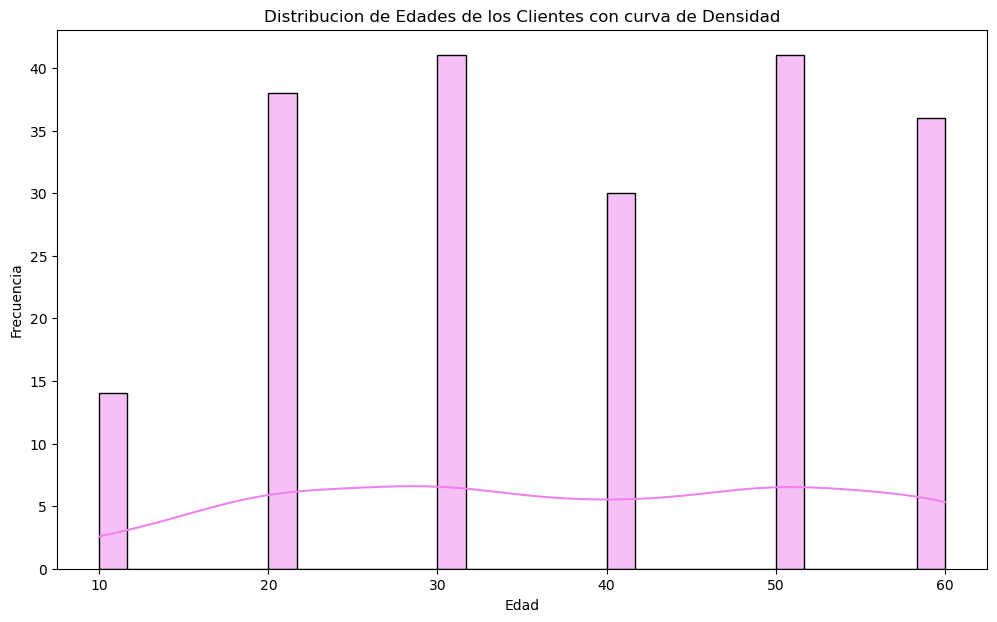

In [128]:
## 5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.
# Grafico para ver la distribucion de las edades y su frecuencia
plt.figure(figsize=(12, 7))
ax = sns.histplot(df["edad"],
                  kde=True,
                  color="violet",
                  bins=30
                )
ax.set(title= "Distribucion de Edades de los Clientes con curva de Densidad",
       xlabel="Edad",
       ylabel="Frecuencia"
      );

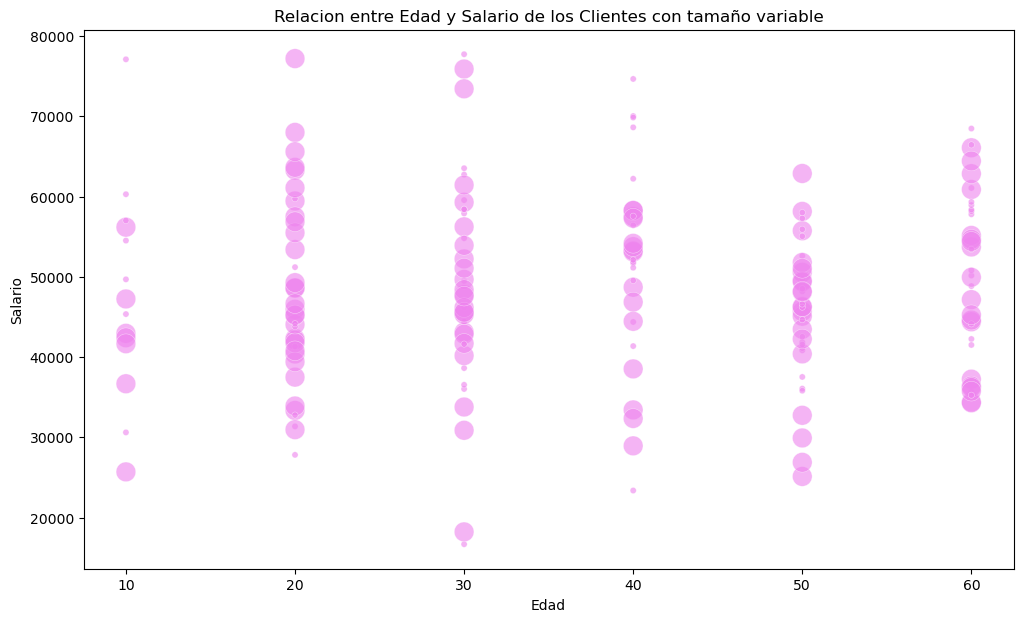

In [146]:
# Visualizacion 2: Relacion entre la Edad y el Salario
plt.figure(figsize=(12, 7))
sizes = df["categoria"].replace({0: 50, 1: 100}) #Asigna el tamaño segun la categoria que va a graficar
scatter = sns.scatterplot(x="edad",
                          y="salario",
                          size=sizes,
                          legend=False,
                          sizes=(20, 200),
                          data=df,
                          color="violet",
                          alpha=0.6
                         )
scatter.set(title="Relacion entre Edad y Salario de los Clientes con tamaño variable",
            xlabel="Edad",
            ylabel="Salario"
           );

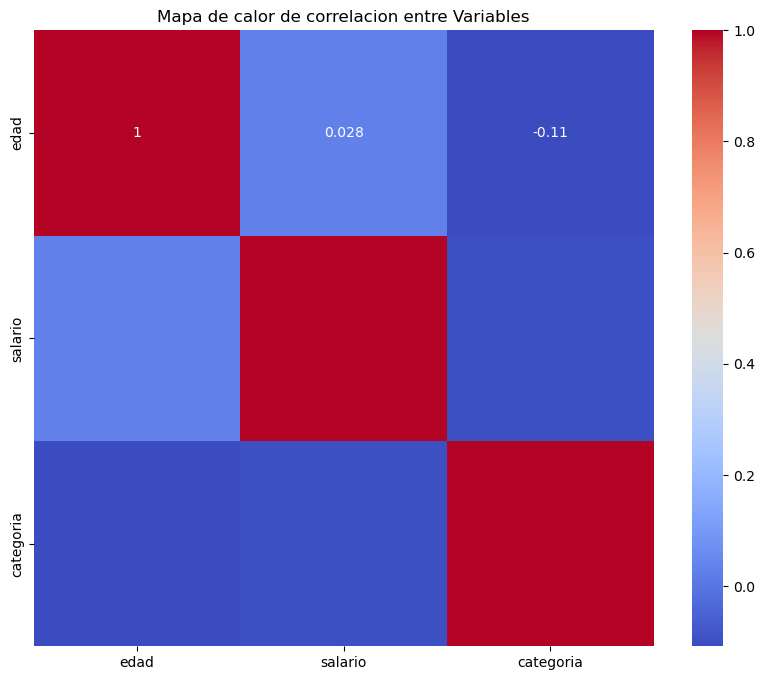

In [144]:
#Visualizacion 3: Mapa de Calor de correlacion entras las variables
plt.figure(figsize=(10, 8))
#Calculamos la matriz de correlacion entre las variables
correlacion_matrix = df[["edad","salario","categoria"]].corr()
heatmap= sns.heatmap(correlacion_matrix,
                    annot=True,
                     cmap="coolwarm"
                    )
heatmap.set(title="Mapa de calor de correlacion entre Variables");